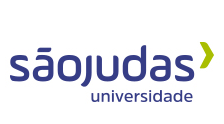

# Inteligência Artifical
- **Professor:** Sergio Bonato <antonio.bonato@saojudas.br>

## Aprendizado Supervisionado - Métricas de Classificação

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.metrics import balanced_accuracy_score, multilabel_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve

## Métricas Binárias

In [2]:
y_r = list('A'*150)+list('B'*350)
y_p = list('A'*120)+list('B'*30)+list('A'*40)+list('B'*310)

In [3]:
len(y_p)

500

In [4]:
y = np.array(y_r)
y_pred = np.array(y_p)

### Matriz de Confusão Binária

In [7]:
labels = ['A','B']
pd.DataFrame(confusion_matrix(y,y_pred),index=labels,columns=labels)

,A,B
A,120,30
B,40,310


In [8]:
confusion_matrix(y,y_pred)

array([[120,  30],
       [ 40, 310]])

### Classification Report Binário

O classification report é o principal resumo de métricas de métricas de um modelo de classificação no Scikit-Learn. 
Nas primeiras 3 linhas temos a precisão, a revocação e o f1 de cada uma das classes conforme calculamos nos slides anteriores. A coluna support é o número de amostras de cada classe.
Nas 3 últimas linhas temos as médias do modelo:
- **accuracy:** é calculada levando em conta somente os verdadeiros positivos e o total de amostras. Neste exemplo temos `(120 + 310) / 500 = 0.8600`. É o mesmo que o f1-score. Veja mais sobre isso no próximo slide.
- **macro avg:** é a média simples das métricas de cada classe. A macro avg de precision é `(0.7500 + 0.9118) / 2 = 0.8309`
- **weighted avg:** é a média ponderada pelo número de amostras (support) das métricas de cada classe. Novamente, no caso de precison, a weighted avg é `(150 x 0.7500 + 350 x 0.9118) / 500 = 0.8632`

In [9]:
print(classification_report(y, y_pred, target_names=labels, digits=4))

              precision    recall  f1-score   support

           A     0.7500    0.8000    0.7742       150
           B     0.9118    0.8857    0.8986       350

    accuracy                         0.8600       500
   macro avg     0.8309    0.8429    0.8364       500
weighted avg     0.8632    0.8600    0.8612       500



### Acurácia Balanceada Binária
É o mesmo que o macro avg recall

In [10]:
bal_acc = balanced_accuracy_score(y, y_pred)
print('balanced accuracy: %.4f' % round(bal_acc,4))

balanced accuracy: 0.8429


In [13]:
rec = recall_score(y, y_pred, average='macro')
print('recall: %.4f' % round(rec,4))

recall: 0.8429


#### As micro average tem o mesmo resultado em todas as métricas. Então o classification report considera somente a accuracy.

In [14]:
acc = accuracy_score(y, y_pred)
print('accuracy: %.4f' % round(acc,4))

accuracy: 0.8600


In [15]:
prec = precision_score(y, y_pred, average='micro')
print('precision: %.4f' % round(prec,4))

precision: 0.8600


In [16]:
rec = recall_score(y, y_pred, average='micro')
print('recall: %.4f' % round(rec,4))

recall: 0.8600


In [17]:
f1 = f1_score(y, y_pred, average='micro')
print('f1: %.4f' % round(f1,4))

f1: 0.8600


In [18]:
y_true = np.array(list(map(lambda x: 1 if x=='A' else 0, y)))
y_score = np.array(list(map(lambda x: 1 if x=='A' else 0, y_pred)))
tfp, tvp, limiar = roc_curve(y_true,y_score)

In [19]:
def plot_roc_curve(tfp, tvp, label=None):
    plt.plot(tfp, tvp, linewidth=2, label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('Taxa Falsos Positivos')
    plt.ylabel('Taxa Verdadeiros Positivos')

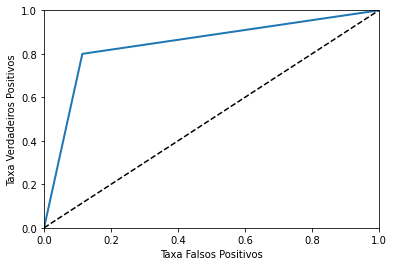

In [20]:
plot_roc_curve(tfp,tvp)
plt.show()

## Métricas Multiclasse

In [22]:
y_r = ['A','A','A','A','A','A','A','A','A','A','B','B','B','B','B','B','B','B','B',
       'C','C','C','C','C','C','C','C','C','C','C','C']
y_p = ['A','A','A','A','A','A','B','B','B','B','A','A','A','B','B','B','B','C','C',
       'B','C','C','C','C','C','C','C','C','C','C','C']

In [23]:
y = np.array(y_r)
y_pred = np.array(y_p)

### Matriz de Confusão Multiclasse

In [24]:
labels = ['A','B','C']
pd.DataFrame(confusion_matrix(y,y_pred),index=labels,columns=labels)

,A,B,C
A,6,4,0
B,3,4,2
C,0,1,11


Na matriz de confusão multiclasse MCM do Scikit-Learn, a contagem dos verdadeiros negativos **VN** está em `MCM [0,0]`, dos falso negativos **FN** está em `MCM[1,0]`, verdadeiros positivos **VP** em `MCM[1,1]` e os falso positivos **FP** em `MCM[0,1]`.

In [25]:
multilabel_confusion_matrix(y,y_pred,labels=labels)

array([[[18,  3],
        [ 4,  6]],

       [[17,  5],
        [ 5,  4]],

       [[17,  2],
        [ 1, 11]]])

### Classification Report Multiclasse

O classification report é o principal resumo de métricas de métricas de um modelo de classificação no Scikit-Learn. 
Nas primeiras 3 linhas temos a precisão, a revocação e o f1 de cada uma das classes conforme calculamos nos slides anteriores. A coluna support é o número de amostras de cada classe.
Nas 3 últimas linhas temos as médias do modelo:
- **accuracy:** é calculada levando em conta somente os verdadeiros positivos e o total de amostras. Neste exemplo temos `(6 + 4 + 11) / 31 = 0.6674`. É o mesmo que o f1-score. Veja mais sobre isso no próximo slide.
- **macro avg:** é a média simples das métricas de cada classe. A macro avg de precision é `(0.6667 + 0.4444 + 0.8462) / 3 = 0.6524`
- **weighted avg:** é a média ponderada pelo número de amostras (support) das métricas de cada classe. Novamente, no caso de precison, a weighted avg é `(10 x 0.6667 + 9 x 0.4444 + 12 x 0.8462) / 31 = 0.6716`

In [26]:
print(classification_report(y, y_pred, target_names=labels, digits=4))

              precision    recall  f1-score   support

           A     0.6667    0.6000    0.6316        10
           B     0.4444    0.4444    0.4444         9
           C     0.8462    0.9167    0.8800        12

    accuracy                         0.6774        31
   macro avg     0.6524    0.6537    0.6520        31
weighted avg     0.6716    0.6774    0.6734        31



### Acurácia Balanceda Multiclasse
É o mesmo que o macro avg recall

In [29]:
bal_acc = balanced_accuracy_score(y, y_pred)
print('balanced accuracy: %.4f' % round(bal_acc,4))

balanced accuracy: 0.6537


In [30]:
rec = recall_score(y, y_pred, average='macro')
print('recall: %.4f' % round(rec,4))

recall: 0.6537


#### As micro average tem o mesmo resultado em todas as métricas. Então o classification report considera somente a accuracy.

In [31]:
acc = accuracy_score(y, y_pred)
print('accuracy: %.4f' % round(acc,4))

accuracy: 0.6774


In [32]:
prec = precision_score(y, y_pred, average='micro')
print('precision: %.4f' % round(prec,4))

precision: 0.6774


In [33]:
rec = recall_score(y, y_pred, average='micro')
print('recall: %.4f' % round(rec,4))

recall: 0.6774


In [34]:
f1 = f1_score(y, y_pred, average='micro')
print('f1: %.4f' % round(f1,4))

f1: 0.6774
